# Projeto de Análise de Dados com Python 

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [11]:
plt.style.use('seaborn-v0_8')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()["color"]

In [7]:
from fredapi import Fred

FRED API Key

In [19]:
f = open("/home/igoandrade/.tokens/igoandrade-pi.fredapi.txt", "r")
fred_key = f.readline().replace('\n', '')

## 1. Criação do objeto FRED 

In [20]:
fred = Fred(api_key=fred_key)

In [21]:
fred

## 2. Busca por dados econômicos

In [26]:
sp_search = fred.search('S&P', order_by='popularity')

In [27]:
sp_search.shape

(1000, 15)

In [28]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-02-10,2023-02-10,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-02-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-10 08:56:14-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-02-10,2023-02-10,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-02-10,2023-02-10,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-02-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-10 08:56:17-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-02-10,2023-02-10,S&P 500,2013-02-11,2023-02-10,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-10 19:11:01-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-02-10,2023-02-10,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,82,"For more information regarding the index, plea..."


## 3. Obtenção de dados brutos

In [30]:
sp500 = fred.get_series(series_id='sp500')

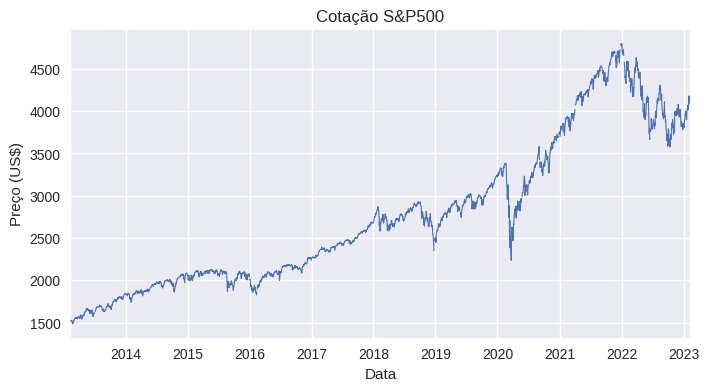

In [43]:
sp500.plot(
    figsize=(8, 4), lw=.8,
    title='Cotação S&P500',
    xlabel='Data',
    ylabel='Preço (US$)'
)

plt.show()

## 4. Obtenção de dados de múltiplas séries de dados

In [45]:
uemp_results = fred.search('unemployment')

In [46]:
uemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-10,2023-02-10,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-02-10,2023-02-10,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
NROU,NROU,2023-02-10,2023-02-10,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,68,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-02-10,2023-02-10,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2023-02-10,2023-02-10,Continued Claims (Insured Unemployment),1967-01-07,2023-01-28,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-02-09 07:36:02-06:00,73,"Continued claims, also referred to as insured ..."


In [47]:
uemp_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, UNRATE to MOSTURN
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1000 non-null   object        
 1   realtime_start             1000 non-null   datetime64[ns]
 2   realtime_end               1000 non-null   datetime64[ns]
 3   title                      1000 non-null   object        
 4   observation_start          1000 non-null   datetime64[ns]
 5   observation_end            1000 non-null   datetime64[ns]
 6   frequency                  1000 non-null   object        
 7   frequency_short            1000 non-null   object        
 8   units                      1000 non-null   object        
 9   units_short                1000 non-null   object        
 10  seasonal_adjustment        1000 non-null   object        
 11  seasonal_adjustment_short  1000 non-null   object        
 12  las

In [49]:
unrate = fred.get_series('UNRATE')

In [50]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-09-01    3.5
2022-10-01    3.7
2022-11-01    3.6
2022-12-01    3.5
2023-01-01    3.4
Length: 901, dtype: float64

In [56]:
uemp_results.loc['UNRATE']['notes']

"The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces.  This rate is also defined as the U-3 measure of labor underutilization.  The series comes from the 'Current Population Survey (Household Survey)'  The source code is: LNS14000000"

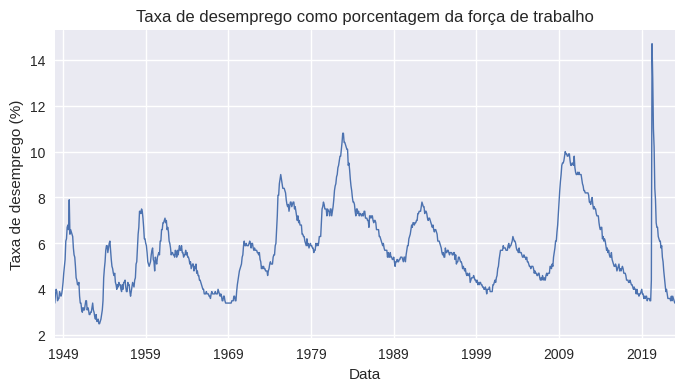

In [57]:
unrate.plot(
    figsize=(8,4), lw=1,
    title='Taxa de desemprego como porcentagem da força de trabalho',
    xlabel='Data',
    ylabel='Taxa de desemprego (%)'
)
plt.show()

In [59]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [62]:
unemp_df.head(3)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-10,2023-02-10,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-02-10,2023-02-10,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-02-10,2023-02-10,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,69,The series comes from the 'Current Population ...


In [64]:
unemp_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-10,2023-02-10,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
U6RATE,U6RATE,2023-02-10,2023-02-10,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:13-06:00,69,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-02-10,2023-02-10,Unemployment Rate - Black or African American,1972-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:12-06:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-02-10,2023-02-10,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,58,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-02-10,2023-02-10,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000048,LNS14000048,2023-02-10,2023-02-10,Unemployment Rate - 25 Yrs. & over,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:45:35-06:00,5,The series comes from the 'Current Population ...
LNS14000061,LNS14000061,2023-02-10,2023-02-10,"Unemployment Rate - 25-54 Yrs., Men",1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:45:35-06:00,3,The series comes from the 'Current Population ...
USAURAMS,USAURAMS,2023-02-10,2023-02-10,Unemployment Rate in the United States (DISCON...,2007-01-01,2013-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2013-09-03 11:06:07-05:00,3,Bureau of Labor Statistics (BLS) has eliminate...
